In [23]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np


In [24]:
netflix_df = pd.read_csv('netflix_titles.csv')
# Dataset is now stored in a Pandas Dataframe
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [26]:
#Data Cleaning

#we already have release. year so drop date_added
netflix_df.drop(['date_added'],axis =1,inplace = True)

#all titles appear on netflix US, so replace NaN countries with United States
netflix_df['country'].replace(np.nan, 'United States',inplace  = True)

In [27]:
netflix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [28]:
#Now it's time for exploratory data analysis

In [29]:
#QUESTION 1
#1 - In 2021, did netflix release more movies or TV shows?
#Filter cleaned dataframe for only movies

movies = netflix_df[netflix_df['type'] == 'Movie']

#Filter movies dataframe for only 2021. movies - then get the total count
movies2021 = movies[movies['release_year'] == 2021]
movies2021.count()

show_id         277
type            277
title           277
director        252
cast            244
country         277
release_year    277
rating          277
duration        277
listed_in       277
description     277
dtype: int64

In [30]:
#Filter dataframe for only tv shows
tvShows = netflix_df[netflix_df['type'] == 'TV Show']
#Filter tvshows dataframe for only 2021 tvshows - then get the total count
tvShows2021 = tvShows[tvShows['release_year'] == 2021]
tvShows2021.count()

show_id         315
type            315
title           315
director         45
cast            250
country         315
release_year    315
rating          315
duration        315
listed_in       315
description     315
dtype: int64

In [31]:
#QUESTION 2

#Whats the most common movie category released?


movies2021.listed_in.value_counts()


Documentaries                                                   20
Comedies, Dramas, International Movies                          15
Children & Family Movies, Comedies                              13
Children & Family Movies                                        12
Stand-Up Comedy                                                 12
                                                                ..
Horror Movies, Independent Movies, International Movies          1
Action & Adventure, Anime Features, Children & Family Movies     1
Action & Adventure, Dramas                                       1
Action & Adventure, Anime Features                               1
Comedies, LGBTQ Movies, Thrillers                                1
Name: listed_in, Length: 68, dtype: int64

In [32]:
#QUESTION 3
#What's the most common tv show category?
tvShows2021.listed_in.value_counts()

Kids' TV                                                      24
Reality TV                                                    18
Docuseries                                                    15
International TV Shows, TV Dramas                             11
International TV Shows, Romantic TV Shows, TV Comedies        10
                                                              ..
International TV Shows, TV Action & Adventure, TV Comedies     1
TV Action & Adventure, TV Dramas, TV Horror                    1
Crime TV Shows, International TV Shows, TV Thrillers           1
Anime Series, Crime TV Shows, TV Horror                        1
TV Action & Adventure, TV Comedies, TV Dramas                  1
Name: listed_in, Length: 97, dtype: int64

In [33]:
#QUESTION 4
#What 5 countries are movies most often released?

movies2021.country.value_counts() 


United States                            157
India                                     22
South Korea                                6
United Kingdom                             6
France                                     5
Spain                                      5
China                                      4
South Africa                               4
Italy                                      4
Indonesia                                  4
United Kingdom, United States              4
Brazil                                     3
Mexico                                     3
Nigeria                                    2
Sweden                                     2
Turkey                                     2
Japan                                      2
Netherlands                                2
Thailand                                   2
Colombia                                   2
Poland                                     2
Australia                                  2
Russia, Un

In [34]:
#QUESTION 5
#What 5 countries are tv shows most often released?
tvShows2021.country.value_counts()

United States                                 190
United Kingdom                                 16
South Korea                                    13
Japan                                          10
India                                           9
Spain                                           9
Mexico                                          6
Australia                                       5
Germany                                         4
Canada                                          3
Turkey                                          3
United States, United Kingdom                   3
Israel                                          2
Thailand                                        2
Poland                                          2
United States, Canada                           2
Italy                                           2
France                                          2
France, United States                           2
Belgium                                         2


<AxesSubplot:>

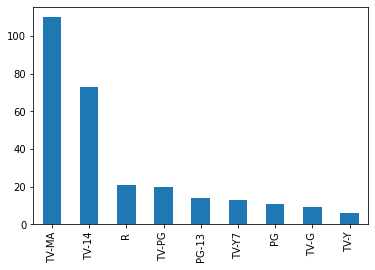

In [35]:
#visualize the distribution of ratings for all titles?
allRatings = movies2021.rating.value_counts()
allRatings.plot(kind='bar')

<AxesSubplot:>

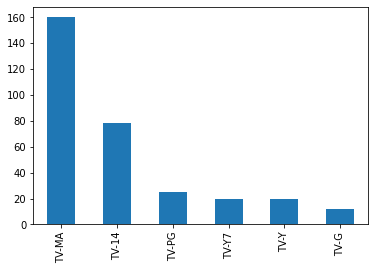

In [36]:
#visualize the distribution of tv show ratings?
tvRatings = tvShows2021.rating.value_counts()
tvRatings.plot(kind='bar')

In [ ]:
'''
Information about which categories of content is most popular on Netflix, most popular countries for content and
move rating  information is useful for decision makers at analyst.
'''